In [2]:
conda list

# packages in environment at /home/cytech/anaconda3:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0            py39h06a4308_1  
_libgcc_mutex             0.1                        main  
_openmp_mutex             4.5                       1_gnu  
absl-py                   1.4.0                    pypi_0    pypi
aiohttp                   3.8.1            py39h7f8727e_1  
aiosignal                 1.2.0              pyhd3eb1b0_0  
alabaster                 0.7.12             pyhd3eb1b0_0  
anaconda                  2022.05                  py39_0  
anaconda-client           1.9.0            py39h06a4308_0  
anaconda-navigator        2.1.4            py39h06a4308_0  
anaconda-project          0.10.2             pyhd3eb1b0_0  
anyio                     3.5.0            py39h06a4308_0  
appdirs                   1.4.4              pyhd3eb1b0_0  
argon2-cffi               21.3.0             pyhd3eb1b0_0  
argon2-cffi-bindings      21.2.0


Note: you may need to restart the kernel to use updated packages.


In [3]:
#artificial neural network for pricing option 




In [1]:
#import libraries
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import math 
import numpy as np 
import pandas as pa
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense 
from sklearn.metrics import r2_score 

/home/cytech/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-07-22 08:02:56.589180: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-22 08:02:56.591310: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-22 08:02:56.631316: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-22 08:02:56.632195: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critica

In [5]:
#function we want to apporximate 
# y = 3*x²+6

def f(x):
     return 3*x**2 + 6
    
x = np.arange(-10,10.1,0.1)
y = f(x)


In [21]:
y

array([306.  , 300.03, 294.12, 288.27, 282.48, 276.75, 271.08, 265.47,
       259.92, 254.43, 249.  , 243.63, 238.32, 233.07, 227.88, 222.75,
       217.68, 212.67, 207.72, 202.83, 198.  , 193.23, 188.52, 183.87,
       179.28, 174.75, 170.28, 165.87, 161.52, 157.23, 153.  , 148.83,
       144.72, 140.67, 136.68, 132.75, 128.88, 125.07, 121.32, 117.63,
       114.  , 110.43, 106.92, 103.47, 100.08,  96.75,  93.48,  90.27,
        87.12,  84.03,  81.  ,  78.03,  75.12,  72.27,  69.48,  66.75,
        64.08,  61.47,  58.92,  56.43,  54.  ,  51.63,  49.32,  47.07,
        44.88,  42.75,  40.68,  38.67,  36.72,  34.83,  33.  ,  31.23,
        29.52,  27.87,  26.28,  24.75,  23.28,  21.87,  20.52,  19.23,
        18.  ,  16.83,  15.72,  14.67,  13.68,  12.75,  11.88,  11.07,
        10.32,   9.63,   9.  ,   8.43,   7.92,   7.47,   7.08,   6.75,
         6.48,   6.27,   6.12,   6.03,   6.  ,   6.03,   6.12,   6.27,
         6.48,   6.75,   7.08,   7.47,   7.92,   8.43,   9.  ,   9.63,
      

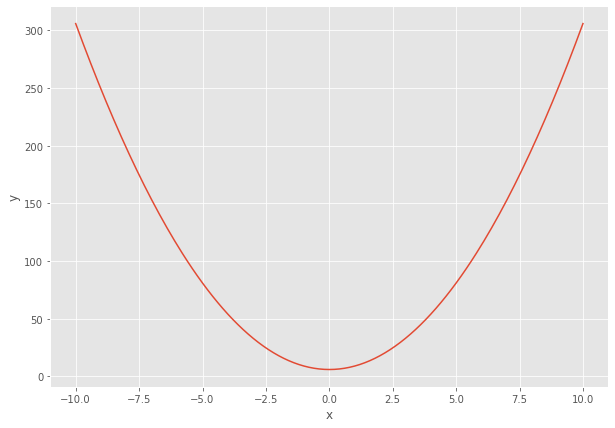

In [8]:
plt.figure( figsize= (10,7))
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [9]:
#build the training and test datasets
X= x
y=y
X_train ,X_test ,y_train , y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [11]:
#AAN with layers (nombres de reseaux) , 10 neuronnes each 
#activation function : ReLU

ANN = Sequential()
ANN.add(Dense(10,input_dim = 1 , activation = 'relu'))
ANN.add(Dense(10 ,activation = 'relu'))
ANN.add(Dense(10 , activation = 'relu'))
ANN.add(Dense(10 , activation = 'relu'))
ANN.add(Dense(1))

In [18]:
#Loss function = MSE , optimizer : Adam
ANN.compile(loss ='mean_squared_error', optimizer = 'adam')
#fit the ANN on the training dataset 
ANN.fit(X_train , y_train , epochs = 150 , batch_size = 16)

Epoch 1/150
10/10 [==============================] - 1s 1ms/step - loss: 2.6242
Epoch 2/150
10/10 [==============================] - 0s 1ms/step - loss: 1.7317
Epoch 3/150
10/10 [==============================] - 0s 1ms/step - loss: 1.0930
Epoch 4/150
10/10 [==============================] - 0s 1ms/step - loss: 0.7260
Epoch 5/150
10/10 [==============================] - 0s 1ms/step - loss: 0.5156
Epoch 6/150
10/10 [==============================] - 0s 1ms/step - loss: 0.8706
Epoch 7/150
10/10 [==============================] - 0s 2ms/step - loss: 0.7975
Epoch 8/150
10/10 [==============================] - 0s 2ms/step - loss: 0.7145
Epoch 9/150
10/10 [==============================] - 0s 2ms/step - loss: 0.7455
Epoch 10/150
10/10 [==============================] - 0s 2ms/step - loss: 1.0718
Epoch 11/150
10/10 [==============================] - 0s 2ms/step - loss: 1.0456
Epoch 12/150
10/10 [==============================] - 0s 1ms/step - loss: 0.5248
Epoch 13/150
10/10 [=================

In [19]:
#prediction 

y_pred = ANN.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [20]:
y_pred 


array([[206.39156  ],
       [153.30542  ],
       [  7.8190846],
       [  6.53402  ],
       [182.84041  ],
       [206.02968  ],
       [276.66922  ],
       [ 70.04873  ],
       [237.21382  ],
       [ 88.27434  ],
       [ 50.787903 ],
       [ 25.039883 ],
       [195.49828  ],
       [ 94.34956  ],
       [ 17.823189 ],
       [265.39627  ],
       [141.29578  ],
       [ 32.745193 ],
       [124.73569  ],
       [ 26.030617 ],
       [211.43698  ],
       [ 67.01112  ],
       [ 97.71311  ],
       [109.91554  ],
       [ 53.06495  ],
       [ 21.995426 ],
       [191.27898  ],
       [222.25148  ],
       [ 20.723312 ],
       [100.967026 ],
       [215.28822  ],
       [ 67.1995   ],
       [ 82.19916  ],
       [  8.710621 ],
       [188.59828  ],
       [243.88057  ],
       [ 31.204136 ],
       [282.3057   ],
       [ 14.250374 ],
       [  7.594048 ],
       [ 40.82011  ],
       [ 40.972034 ],
       [170.80495  ],
       [ 10.0716095],
       [145.14885  ],
       [ 4

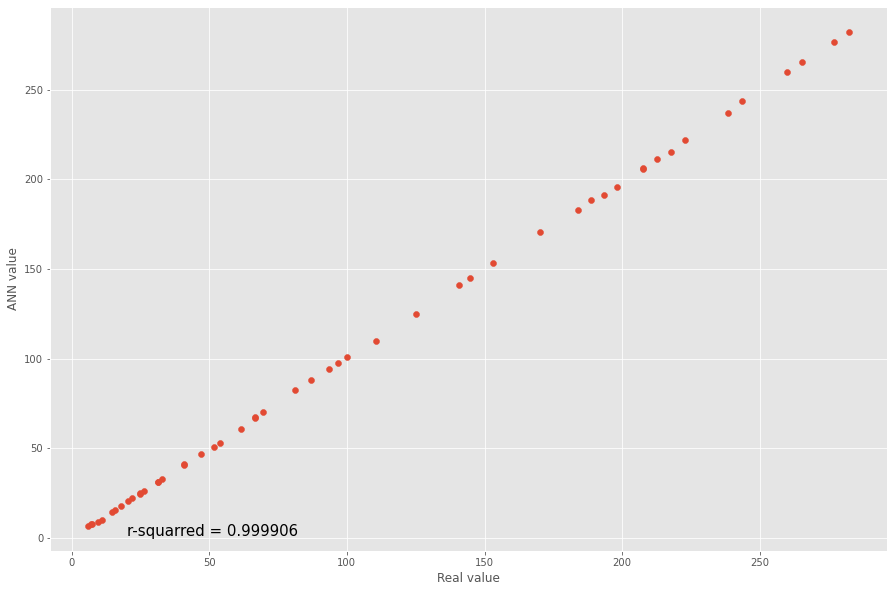

In [22]:
# comparaison real values and predictions on test data set

plt.figure(figsize= (15,10))
plt.scatter(y_test , y_pred)
plt.xlabel("Real value")
plt.ylabel("ANN value")
plt.annotate("r-squarred = {:3f}".format(r2_score(y_test,y_pred)), (20,1),size =15)
plt.show()

In [24]:
#Extrapolation with ANN
X = np.arange(-20,20.1,.01)
y= f(X)
y_pred = ANN.predict(X)

126/126 [==============================] - 0s 690us/step


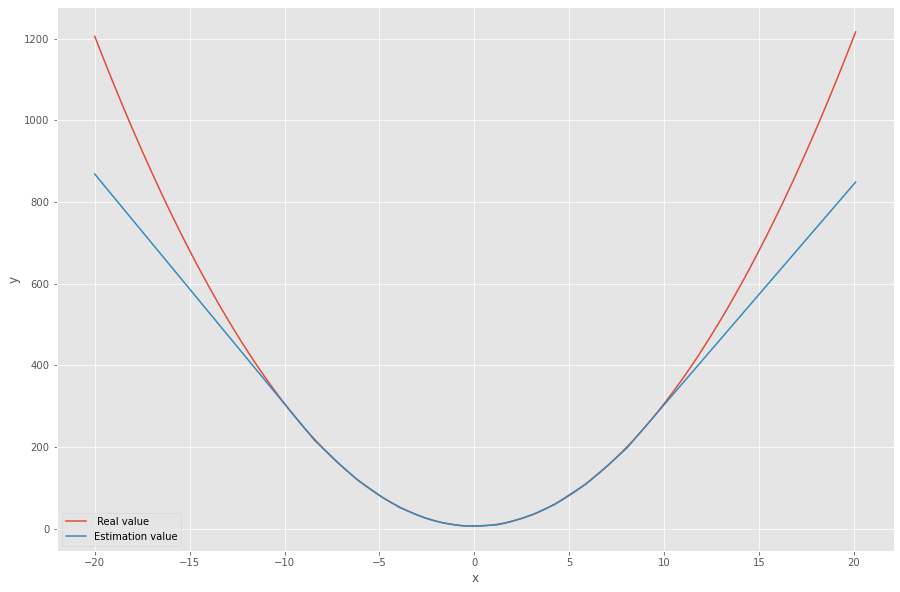

In [25]:
plt.figure(figsize=(15,10))
plt.plot(X,y , label= " Real value")
plt.plot(X, y_pred , label = "Estimation value")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [37]:
class EuropeanOptionBS:
    
    

    def __init__(self , S ,K ,T, r,q,sigma ,Type):
            self.S=S
            self.K = K
            self.T = T
            self.r = r 
            self.q = q
            self.sigma = sigma 
            self.Type = Type 
            self.d1 =self.d1()
            self.d2 =self.d2()
            self.price = self.price()
            
            
    def d1(self):
        d1 = ( math.log(self.S/self.K)+ (self.r - self.q + .5*(self.sigma**2))*self.T)/(self.sigma * self.T**.5)
        return d1
    
    def d2(self):
        d2 = self.d1 - self.sigma * self.T**.5
        return d2
    
    def price(self):
        if self.Type == "Call":
            price = self.S*math.exp(-self.q*self.T)*norm.cdf(self.d1)-self.K*math.exp(-self.r*self.T)*norm.cdf(self.d2)
        if self.Type == "Put":
            price = self.K*math.exp(-self.r*self.T)*norm.cdf(-self.d2)-self.S*math.exp(-self.q*self.T)*norm.cdf(-self.d1)
        return price 

In [38]:
#data set 

r = np.arange(.0 ,.1,.01) # interst rates 
Strike = np.arange(50,155,5)
T= np.arange(0.1,2.1,0.1)
sigma = np.arange(0.1,2.1,.1) 


data = []
for r_ in r :
    for strike_ in Strike :
        for T_ in T :
            for sigma_ in sigma :
                data.append([r_,strike_,T_,sigma_, EuropeanOptionBS(100,strike_,T_,r_,0,sigma_,"Call").price])
                
data = np.asarray(data)

In [39]:
data 

array([[0.00000000e+00, 5.00000000e+01, 1.00000000e-01, 1.00000000e-01,
        5.00000000e+01],
       [0.00000000e+00, 5.00000000e+01, 1.00000000e-01, 2.00000000e-01,
        5.00000000e+01],
       [0.00000000e+00, 5.00000000e+01, 1.00000000e-01, 3.00000000e-01,
        5.00000000e+01],
       ...,
       [9.00000000e-02, 1.50000000e+02, 2.00000000e+00, 1.80000000e+00,
        7.73211020e+01],
       [9.00000000e-02, 1.50000000e+02, 2.00000000e+00, 1.90000000e+00,
        7.99955867e+01],
       [9.00000000e-02, 1.50000000e+02, 2.00000000e+00, 2.00000000e+00,
        8.24286917e+01]])

In [43]:
#test dand train datasets

X = data[:,:4] # params r ,strike , T , sigma 
y = data [: ,4:5] #call price 
X_train ,X_test ,y_train , y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [46]:
#AAN with layers (nombres de reseaux) , 10 neuronnes each 
#activation function : ReLU

ANN = Sequential()
ANN.add(Dense(10,input_dim = 4 , activation = 'relu'))
ANN.add(Dense(10 ,activation = 'relu'))
ANN.add(Dense(10 , activation = 'relu'))
ANN.add(Dense(10 , activation = 'relu'))
ANN.add(Dense(1))

In [47]:
#Loss function = MSE , optimizer : Adam
ANN.compile(loss ='mean_squared_error', optimizer = 'adam')
#fit the ANN on the training dataset 
ANN.fit(X_train , y_train , epochs = 150 , batch_size = 16)

Epoch 1/150
3938/3938 [==============================] - 6s 1ms/step - loss: 229.0897
Epoch 2/150
3938/3938 [==============================] - 5s 1ms/step - loss: 50.7513
Epoch 3/150
3938/3938 [==============================] - 4s 1ms/step - loss: 50.3199
Epoch 4/150
3938/3938 [==============================] - 4s 927us/step - loss: 49.9786
Epoch 5/150
3938/3938 [==============================] - 5s 1ms/step - loss: 49.5484
Epoch 6/150
3938/3938 [==============================] - 4s 945us/step - loss: 49.4640
Epoch 7/150
3938/3938 [==============================] - 4s 1ms/step - loss: 49.3936
Epoch 8/150
3938/3938 [==============================] - 4s 1ms/step - loss: 48.8632
Epoch 9/150
3938/3938 [==============================] - 5s 1ms/step - loss: 48.8361
Epoch 10/150
3938/3938 [==============================] - 5s 1ms/step - loss: 48.6463
Epoch 11/150
3938/3938 [==============================] - 6s 1ms/step - loss: 48.1016
Epoch 12/150
3938/3938 [==============================] - 

In [49]:
y_pred = ANN.predict(X_test)

657/657 [==============================] - 0s 623us/step


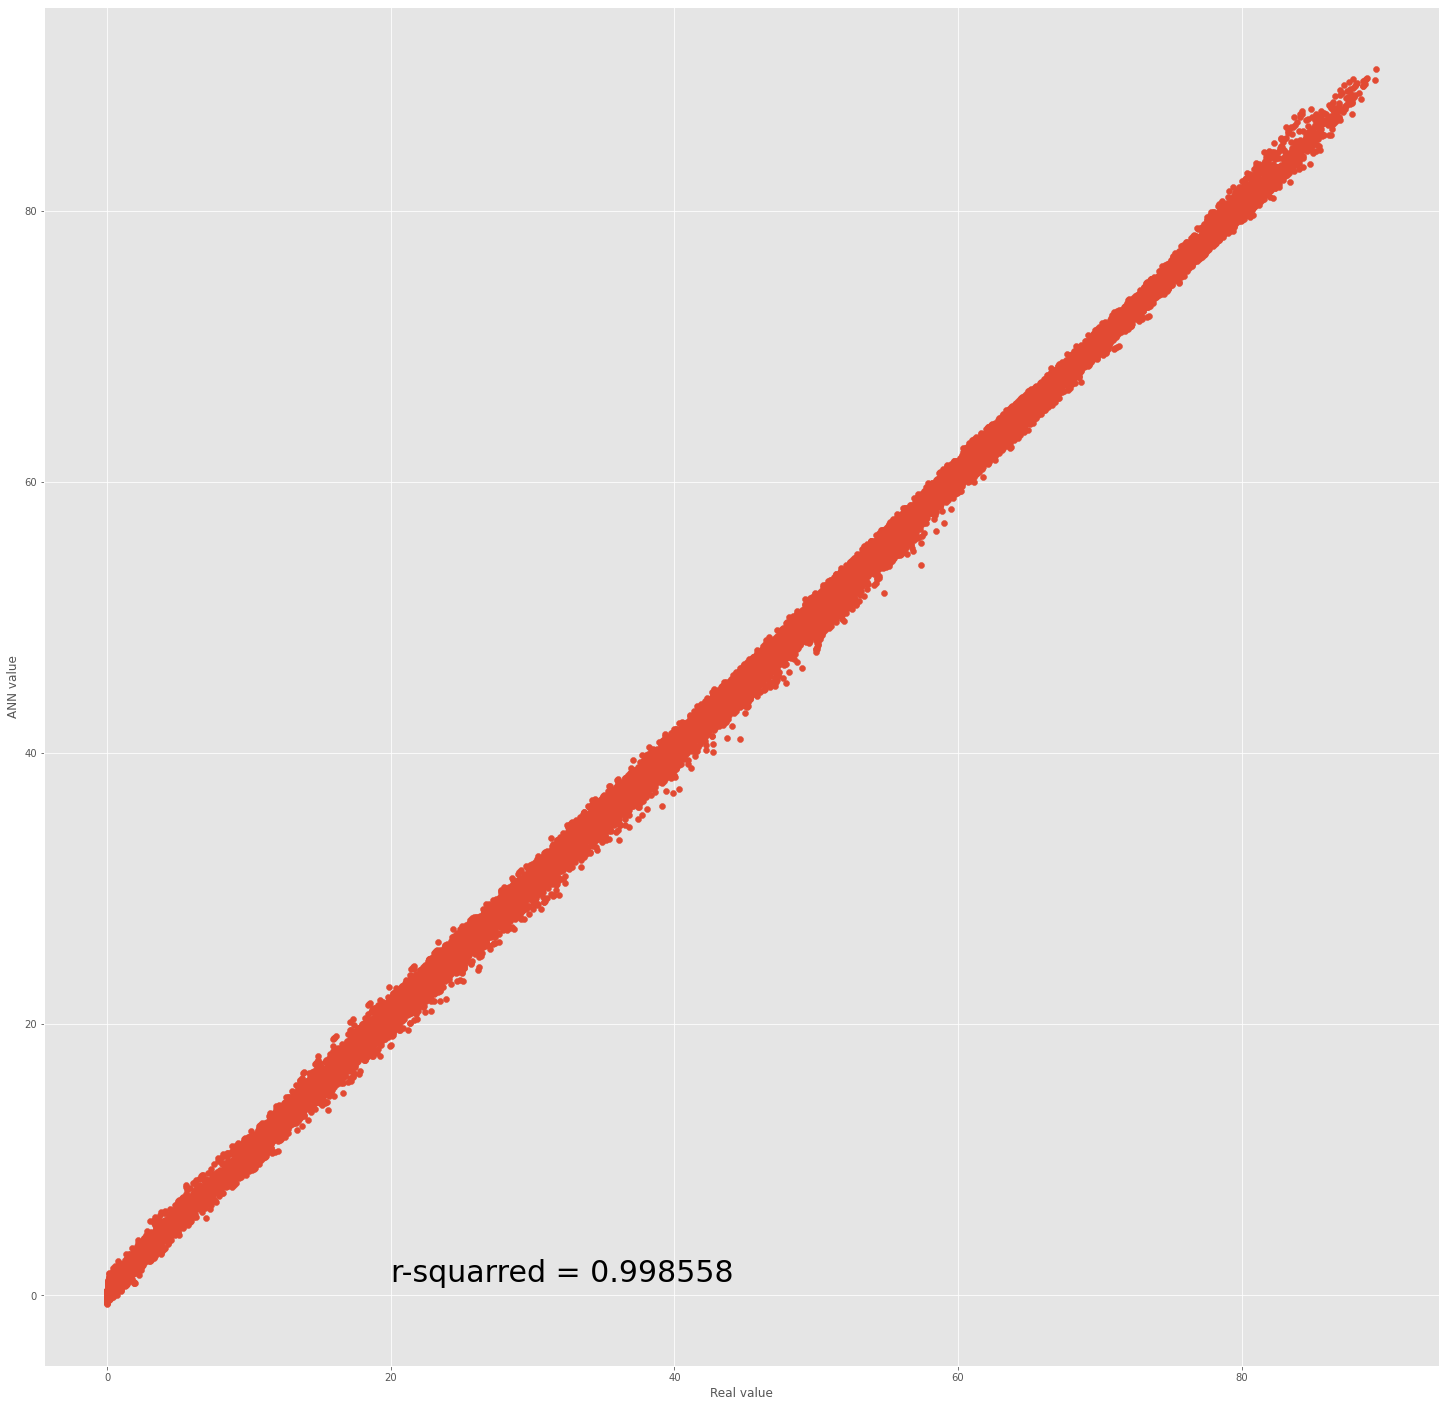

In [53]:
# comparaison real values and predictions on test data set

plt.figure(figsize= (25,25))
plt.scatter(y_test , y_pred)
plt.xlabel("Real value")
plt.ylabel("ANN value")
plt.annotate("r-squarred = {:3f}".format(r2_score(y_test,y_pred)), (20,1),size =30)
plt.show()

In [57]:
K =120
r = 0.05
sigma =.3
T= .5
S = np.arange(50,151,1)
priceBS = [EuropeanOptionBS(S_, K,T,r,0,sigma,"Call").price for S_ in S]
PriceANN = [S_/100 * ANN.predict(np.array([[r,K/S_*100,T,sigma]]))[0][0]for S_ in S]

1/1 [==============================] - 0s 17ms/step


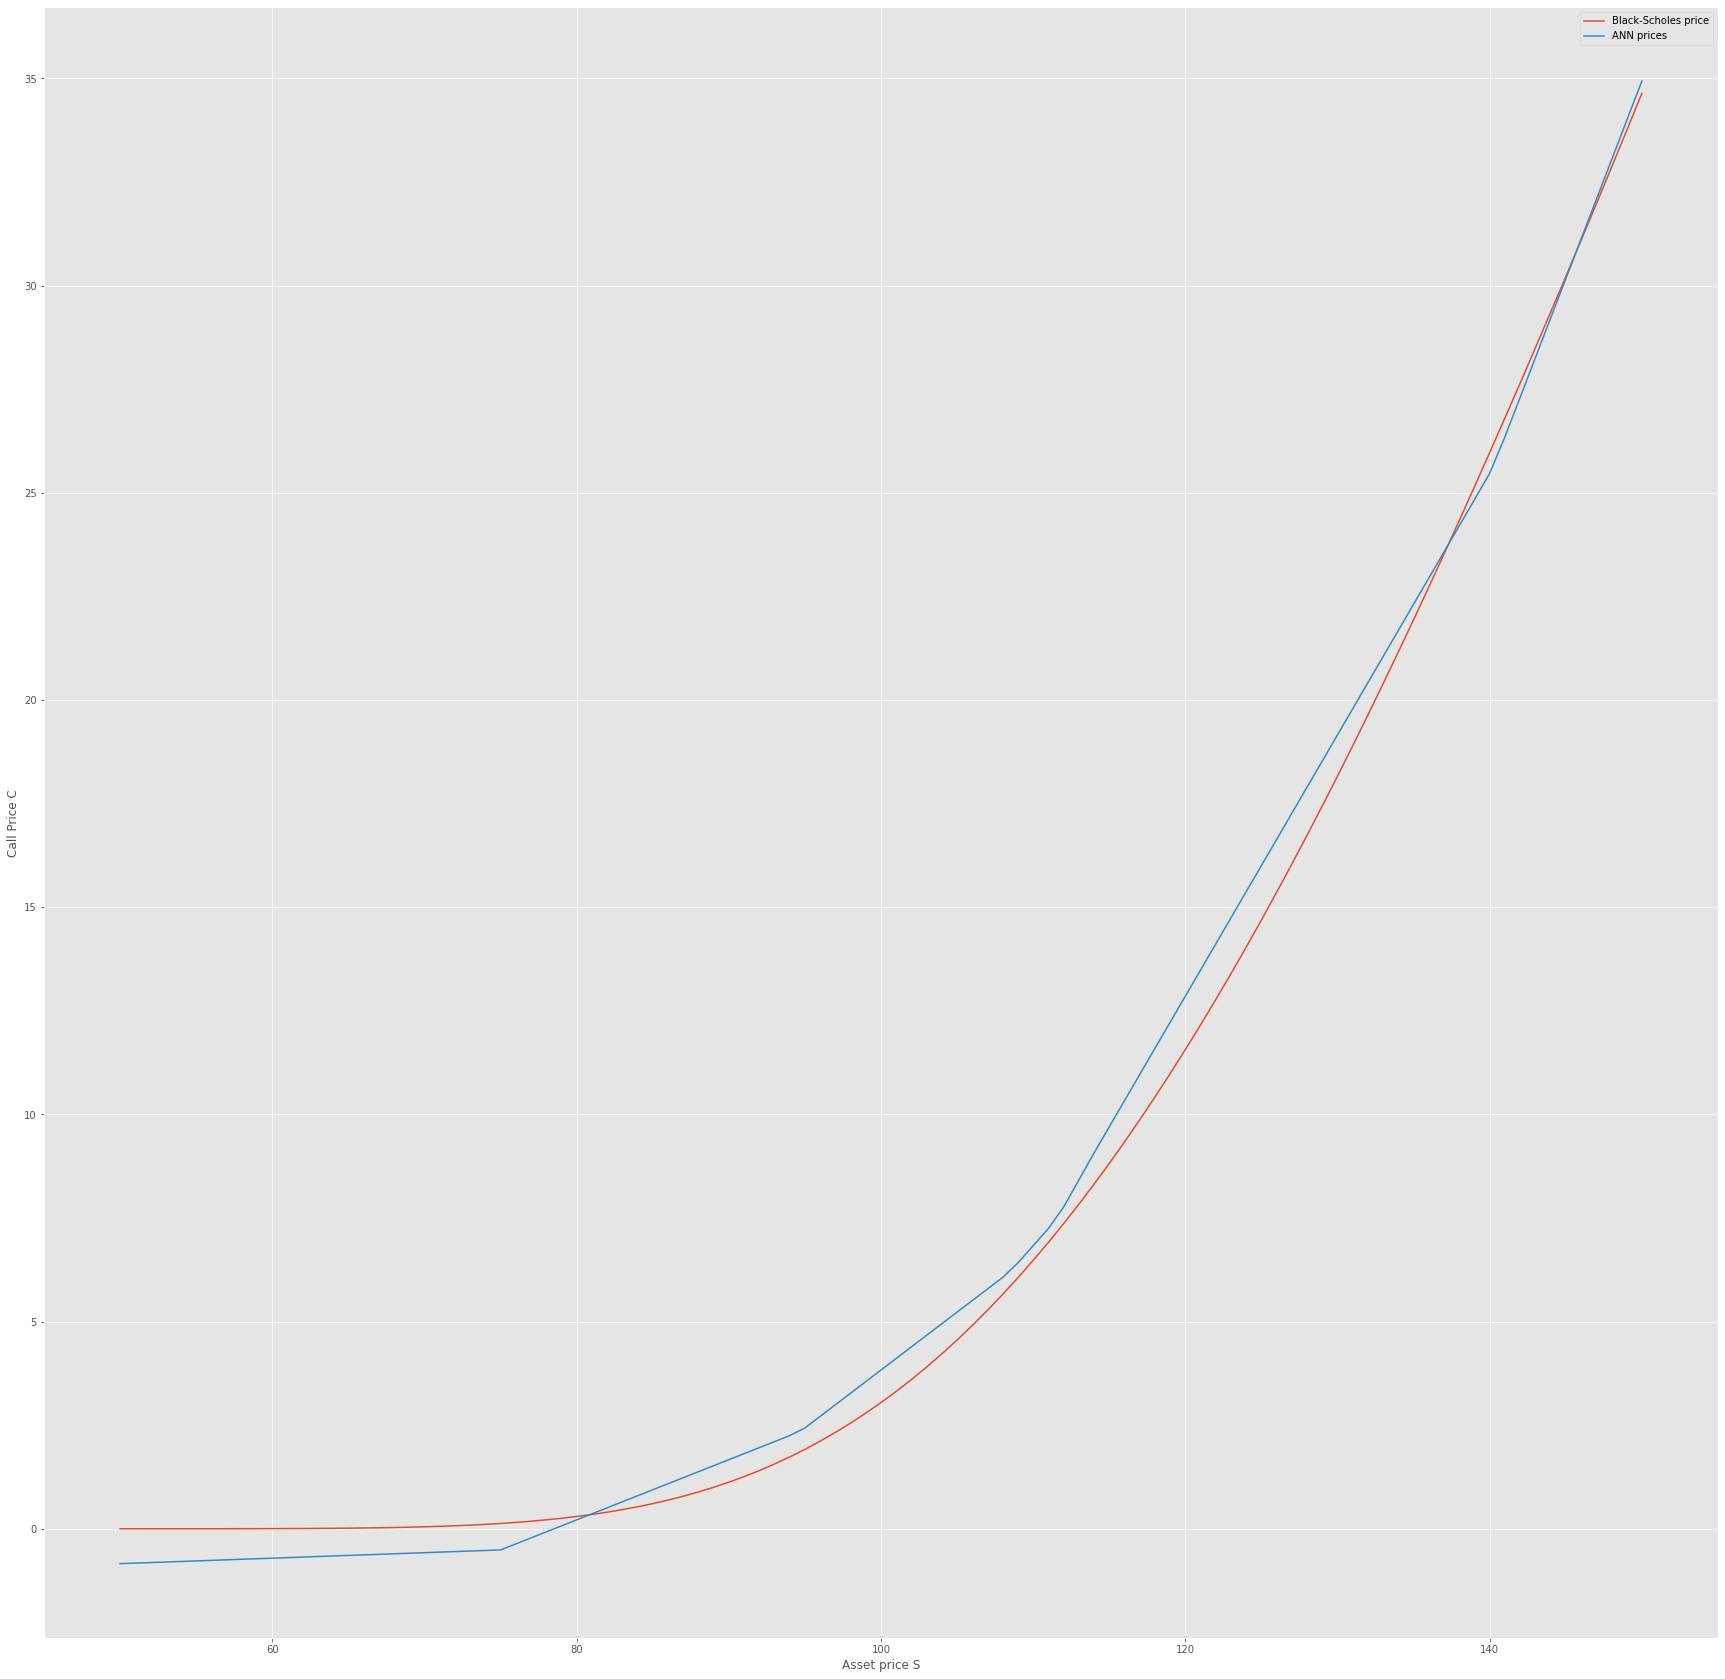

In [66]:
# comparaison BS vs ANN prices 
plt.figure(figsize = (30,30))
plt.plot(S,priceBS , label = "Black-Scholes price")
plt.plot(S, PriceANN , label = "ANN prices")
plt.xlabel("Asset price S")
plt.ylabel("Call Price C")
plt.legend()
plt.show()